In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

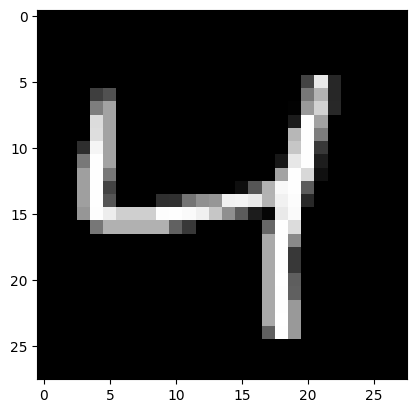

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')

In [8]:
y_train[2]

4

In [9]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
print(f" Training Shape {X_train.shape} Test Shape {X_test.shape}")

 Training Shape (60000, 28, 28, 1) Test Shape (10000, 28, 28, 1)


In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [15]:
#Create Model
model = Sequential()

In [17]:
# Convolutional Layer with 32 filters, 3*3 filter size, stride = 1 and no padding
model.add(Conv2D(32, 
                 kernel_size=3,
                 activation='relu',
                 padding='valid', # value = 'same' if padding is needed
                 input_shape=(28,28,1)))

In [19]:
model.add(MaxPool2D(pool_size = 2)) #Maxpool2D

In [20]:
model.add(Flatten()) #Flatten

In [21]:
model.add(Dense(64, activation = 'relu')) #Fully Connected Layer

In [22]:
model.add(Dense(10,activation='softmax')) #Output Layer

In [23]:
#n-f+1 - no padding case

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [25]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [26]:
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1636 - accuracy: 0.9528 - val_loss: 0.0695 - val_accuracy: 0.9777
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0478 - val_accuracy: 0.9843
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0438 - val_accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0463 - val_accuracy: 0.9856


In [27]:
import numpy as np

In [28]:
print(model.predict(X_train)[0])
print(np.argmax(model.predict(X_train)[0]))

1875/1875 [==============================] - 8s 4ms/step
[2.00521891e-13 1.01741263e-11 1.29448275e-11 2.51154695e-03
 2.20364254e-13 9.97488379e-01 6.24182858e-11 5.47780432e-10
 2.39610043e-09 6.29350652e-08]
1875/1875 [==============================] - 7s 4ms/step
5


In [29]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)

1875/1875 [==============================] - 8s 4ms/step


In [30]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 4ms/step


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
print("Training Set Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Training Set Confusion Matrix
[[5899    1    0    0    4    1    6    1    4    7]
 [   0 6736    0    0    1    0    2    1    2    0]
 [   0    7 5925    1    8    0    0    3    9    5]
 [   0    5    2 6079    0   22    0    5    8   10]
 [   0    4    0    0 5832    0    0    1    0    5]
 [   0    1    0    2    1 5405    4    0    2    6]
 [   0    0    0    0    4   11 5901    0    2    0]
 [   0   17    7    0    5    0    0 6231    1    4]
 [   2    2    0    1    6    8    3    0 5823    6]
 [   0    2    0    0   16    0    0    4    1 5926]]


 Accuracy 0.99595


In [33]:
print("Test Set Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Test Set Confusion Matrix
[[ 970    0    3    0    0    0    4    0    2    1]
 [   0 1130    1    0    1    1    1    0    1    0]
 [   1    4 1013    1    1    0    1    7    2    2]
 [   0    1    3  991    0   11    0    2    2    0]
 [   0    0    0    0  977    0    2    0    0    3]
 [   0    0    0    3    0  882    4    0    1    2]
 [   3    2    0    0    2    4  946    0    1    0]
 [   0    3    8    0    1    0    0 1012    1    3]
 [   6    0    3    1    3    3    1    3  950    4]
 [   0    2    0    0   14    4    0    3    1  985]]


 Accuracy 0.9856


In [34]:
model.save('my_cnn_mnist_model_22Jul.h5')

In [35]:

m1 = tf.keras.models.load_model('my_cnn_mnist_model_22Jul.h5')

In [36]:
y_train_pred1 = np.argmax(m1.predict(X_train),axis=1)

1875/1875 [==============================] - 8s 4ms/step


In [37]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred1, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred1, y_true=y_train)}")

Confusion Matrix
[[5899    1    0    0    4    1    6    1    4    7]
 [   0 6736    0    0    1    0    2    1    2    0]
 [   0    7 5925    1    8    0    0    3    9    5]
 [   0    5    2 6079    0   22    0    5    8   10]
 [   0    4    0    0 5832    0    0    1    0    5]
 [   0    1    0    2    1 5405    4    0    2    6]
 [   0    0    0    0    4   11 5901    0    2    0]
 [   0   17    7    0    5    0    0 6231    1    4]
 [   2    2    0    1    6    8    3    0 5823    6]
 [   0    2    0    0   16    0    0    4    1 5926]]


 Accuracy 0.99595
